## Open Data and Imports 

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import descartes 
from shapely.geometry import Point, Polygon


%matplotlib inline 

In [2]:
raw_df = pd.read_csv('Seoul.csv')
df_measurements = pd.read_csv('Measurement_info.csv')
df_station = pd.read_csv('Measurement_station_info.csv')

In [3]:
raw_df

,Measurement date,Station code,Address,Latitude,Longitude,SO2,NO2,O3,CO,PM10,PM2.5
0,2017-01-01 00:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005007,0.004,0.059,0.002,1.2,73.0,57.0
1,2017-01-01 01:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005007,0.004,0.058,0.002,1.2,71.0,59.0
2,2017-01-01 02:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005007,0.004,0.056,0.002,1.2,70.0,59.0
3,2017-01-01 03:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005007,0.004,0.056,0.002,1.2,70.0,58.0
4,2017-01-01 04:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005007,0.003,0.051,0.002,1.2,69.0,61.0
...,...,...,...,...,...,...,...,...,...,...,...
647506,2019-12-31 19:00,125,"59, Gucheonmyeon-ro 42-gil, Gangdong-gu, Seoul...",37.544962,127.136792,0.003,0.028,0.013,0.5,23.0,17.0
647507,2019-12-31 20:00,125,"59, Gucheonmyeon-ro 42-gil, Gangdong-gu, Seoul...",37.544962,127.136792,0.003,0.025,0.015,0.4,25.0,19.0
647508,2019-12-31 21:00,125,"59, Gucheonmyeon-ro 42-gil, Gangdong-gu, Seoul...",37.544962,127.136792,0.003,0.023,0.015,0.4,24.0,17.0
647509,2019-12-31 22:00,125,"59, Gucheonmyeon-ro 42-gil, Gangdong-gu, Seoul...",37.544962,127.136792,0.003,0.040,0.004,0.5,25.0,18.0


In [4]:
raw_df['Measurement date'] = raw_df['Measurement date'].str.slice(0, 7)
raw_df

,Measurement date,Station code,Address,Latitude,Longitude,SO2,NO2,O3,CO,PM10,PM2.5
0,2017-01,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005007,0.004,0.059,0.002,1.2,73.0,57.0
1,2017-01,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005007,0.004,0.058,0.002,1.2,71.0,59.0
2,2017-01,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005007,0.004,0.056,0.002,1.2,70.0,59.0
3,2017-01,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005007,0.004,0.056,0.002,1.2,70.0,58.0
4,2017-01,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005007,0.003,0.051,0.002,1.2,69.0,61.0
...,...,...,...,...,...,...,...,...,...,...,...
647506,2019-12,125,"59, Gucheonmyeon-ro 42-gil, Gangdong-gu, Seoul...",37.544962,127.136792,0.003,0.028,0.013,0.5,23.0,17.0
647507,2019-12,125,"59, Gucheonmyeon-ro 42-gil, Gangdong-gu, Seoul...",37.544962,127.136792,0.003,0.025,0.015,0.4,25.0,19.0
647508,2019-12,125,"59, Gucheonmyeon-ro 42-gil, Gangdong-gu, Seoul...",37.544962,127.136792,0.003,0.023,0.015,0.4,24.0,17.0
647509,2019-12,125,"59, Gucheonmyeon-ro 42-gil, Gangdong-gu, Seoul...",37.544962,127.136792,0.003,0.040,0.004,0.5,25.0,18.0


In [5]:
raw_df['Measurement date'] = raw_df['Measurement date'].str.slice(0, 11)
df = raw_df.groupby(['Station code', 'Measurement date']).aggregate({'SO2': 'mean', 'NO2':'mean', 'O3':'mean', 'CO':'mean', 'PM10':'mean', 'PM2.5':'mean'})

In [6]:
df

SO2       NO2        O3        CO  \
Station code Measurement date                                           
101          2017-01           0.004401  0.037481  0.014972  0.695968   
             2017-02          -0.022152  0.010290 -0.008138  0.600000   
             2017-03           0.005015  0.041267  0.026862  0.698118   
             2017-04           0.003308  0.034699  0.033512  0.598056   
             2017-05           0.003461  0.031724  0.039319  0.490591   
...                                 ...       ...       ...       ...   
125          2019-08           0.005264  0.017182  0.026261  0.599189   
             2019-09          -0.010603  0.005673  0.010133  0.367791   
             2019-10           0.003179  0.024047  0.018567  0.432392   
             2019-11           0.003303  0.035814  0.011037  0.567083   
             2019-12           0.003443  0.036359  0.009333  0.666257   

                                    PM10      PM2.5  
Station code Measurement date                        
101          2017-01           51.024194  35.118280  
             2017-02           41.970238  28.857143  
             2017-03           55.146505  40.311828  
             2017-04           50.769444  26.536111  
             2017-05           55.129032  22.680108  
...                                  ...        ...  
125          2019-08           24.952703  19.087838  
             2019-09           20.604294  12.699387  
             2019-10           35.092742  17.689516  
             2019-11           49.201389  23.179167  
             2019-12           49.051913  39.494536  

[900 rows x 6 columns]

lets make reset the index of the mesurment date

In [7]:
#df['Measurement date'] = df['Measurement date'].str.slice(-10)
#df['Measurement date'] = pd.to_datetime(df['Measurement date'])
#df.set_index(df['Measurement date'], inplace=True)
#df.drop('Measurement date', axis=1, inplace=True)

In [8]:
df

SO2       NO2        O3        CO  \
Station code Measurement date                                           
101          2017-01           0.004401  0.037481  0.014972  0.695968   
             2017-02          -0.022152  0.010290 -0.008138  0.600000   
             2017-03           0.005015  0.041267  0.026862  0.698118   
             2017-04           0.003308  0.034699  0.033512  0.598056   
             2017-05           0.003461  0.031724  0.039319  0.490591   
...                                 ...       ...       ...       ...   
125          2019-08           0.005264  0.017182  0.026261  0.599189   
             2019-09          -0.010603  0.005673  0.010133  0.367791   
             2019-10           0.003179  0.024047  0.018567  0.432392   
             2019-11           0.003303  0.035814  0.011037  0.567083   
             2019-12           0.003443  0.036359  0.009333  0.666257   

                                    PM10      PM2.5  
Station code Measurement date                        
101          2017-01           51.024194  35.118280  
             2017-02           41.970238  28.857143  
             2017-03           55.146505  40.311828  
             2017-04           50.769444  26.536111  
             2017-05           55.129032  22.680108  
...                                  ...        ...  
125          2019-08           24.952703  19.087838  
             2019-09           20.604294  12.699387  
             2019-10           35.092742  17.689516  
             2019-11           49.201389  23.179167  
             2019-12           49.051913  39.494536  

[900 rows x 6 columns]

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 900 entries, (101, '2017-01') to (125, '2019-12')
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   SO2     900 non-null    float64
 1   NO2     900 non-null    float64
 2   O3      900 non-null    float64
 3   CO      900 non-null    float64
 4   PM10    900 non-null    float64
 5   PM2.5   900 non-null    float64
dtypes: float64(6)
memory usage: 44.5+ KB


Create some new columns for date and month

In [10]:
df = df.reset_index()

This is a general indiction of what levels of certain pollutants are the worse.

In [11]:
df_measurements

,Item code,Item name,Unit of measurement,Good(Blue),Normal(Green),Bad(Yellow),Very bad(Red)
0,1,SO2,ppm,0.02,0.05,0.15,1.0
1,3,NO2,ppm,0.03,0.06,0.20,2.0
2,5,CO,ppm,2.00,9.00,15.00,50.0
3,6,O3,ppm,0.03,0.09,0.15,0.5
4,8,PM10,Mircrogram/m3,30.00,80.00,150.00,600.0
5,9,PM2.5,Mircrogram/m3,15.00,35.00,75.00,500.0


Station based on district of Seoul

In [12]:
df_station

,Station code,Station name(district),Address,Latitude,Longitude
0,101,Jongno-gu,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005008
1,102,Jung-gu,"15, Deoksugung-gil, Jung-gu, Seoul, Republic o...",37.564263,126.974676
2,103,Yongsan-gu,"136, Hannam-daero, Yongsan-gu, Seoul, Republic...",37.540033,127.004850
3,104,Eunpyeong-gu,"215, Jinheung-ro, Eunpyeong-gu, Seoul, Republi...",37.609823,126.934848
4,105,Seodaemun-gu,"32, Segeomjeong-ro 4-gil, Seodaemun-gu, Seoul,...",37.593742,126.949679
5,106,Mapo-gu,"10, Poeun-ro 6-gil, Mapo-gu, Seoul, Republic o...",37.555580,126.905597
6,107,Seongdong-gu,"18, Ttukseom-ro 3-gil, Seongdong-gu, Seoul, Re...",37.541864,127.049659
7,108,Gwangjin-gu,"571, Gwangnaru-ro, Gwangjin-gu, Seoul, Republi...",37.547180,127.092493
8,109,Dongdaemun-gu,"43, Cheonho-daero 13-gil, Dongdaemun-gu, Seoul...",37.575743,127.028885
9,110,Jungnang-gu,"369, Yongmasan-ro, Jungnang-gu, Seoul, Republi...",37.584848,127.094023


# Some EDA 

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Station code      900 non-null    int64  
 1   Measurement date  900 non-null    object 
 2   SO2               900 non-null    float64
 3   NO2               900 non-null    float64
 4   O3                900 non-null    float64
 5   CO                900 non-null    float64
 6   PM10              900 non-null    float64
 7   PM2.5             900 non-null    float64
dtypes: float64(6), int64(1), object(1)
memory usage: 56.4+ KB


In [14]:
df['SO2'].value_counts().head()

0.003918    1
0.007273    1
0.004496    1
0.004919    1
0.003825    1
Name: SO2, dtype: int64

In [15]:
df['NO2'].value_counts()

0.025990    2
0.040359    1
0.036374    1
0.015394    1
0.019831    1
           ..
0.030651    1
0.033114    1
0.021772    1
0.026824    1
0.026224    1
Name: NO2, Length: 899, dtype: int64

In [16]:
df['O3'].value_counts()

0.029632    1
0.028926    1
0.022410    1
0.025836    1
0.023960    1
           ..
0.033201    1
0.009792    1
0.032336    1
0.012113    1
0.028123    1
Name: O3, Length: 900, dtype: int64

In [17]:
df['CO'].value_counts()

0.701075    2
0.421505    1
0.634375    1
0.611156    1
0.445161    1
           ..
0.604032    1
0.624462    1
0.363038    1
0.627395    1
0.723224    1
Name: CO, Length: 899, dtype: int64

In [18]:
df['PM10'].value_counts()

25.282258    2
34.276882    2
26.133065    2
37.694444    1
51.970430    1
            ..
37.572404    1
51.060484    1
37.166667    1
75.773946    1
52.250000    1
Name: PM10, Length: 897, dtype: int64

In [19]:
df['PM2.5'].value_counts()

14.286290    2
21.060484    2
28.212798    2
25.069444    1
35.532258    1
            ..
26.426075    1
16.697095    1
23.416667    1
33.814516    1
26.848214    1
Name: PM2.5, Length: 897, dtype: int64

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Station code      900 non-null    int64  
 1   Measurement date  900 non-null    object 
 2   SO2               900 non-null    float64
 3   NO2               900 non-null    float64
 4   O3                900 non-null    float64
 5   CO                900 non-null    float64
 6   PM10              900 non-null    float64
 7   PM2.5             900 non-null    float64
dtypes: float64(6), int64(1), object(1)
memory usage: 56.4+ KB


Looking to see any correlations between any pollutants 

Lets make a polutant df

In [21]:
df.corr().style.background_gradient(cmap='coolwarm')

,Station code,SO2,NO2,O3,CO,PM10,PM2.5
Station code,1.000000,0.048831,0.053188,0.039719,-0.090727,0.115844,0.077445
SO2,0.048831,1.000000,0.971653,0.964112,0.420468,0.140130,0.189427
NO2,0.053188,0.971653,1.000000,0.939498,0.495141,0.212629,0.266820
O3,0.039719,0.964112,0.939498,1.000000,0.303974,0.109451,0.148118
CO,-0.090727,0.420468,0.495141,0.303974,1.000000,0.411734,0.489367
PM10,0.115844,0.140130,0.212629,0.109451,0.411734,1.000000,0.670239
PM2.5,0.077445,0.189427,0.266820,0.148118,0.489367,0.670239,1.000000


Looking at Stations and different 

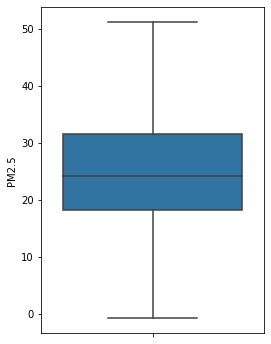

In [22]:
#Pm2.5 Levels by Stations
fig, axes = plt.subplots(1, 1, figsize=(4, 6))
sns.boxplot(y='PM2.5', data=df, showfliers=False);

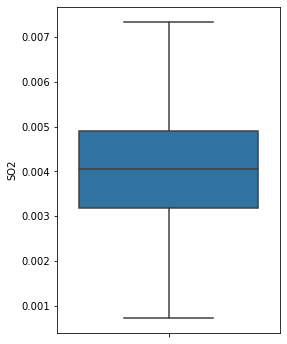

In [23]:
#SO2 Levels by Stations
fig, axes = plt.subplots(1, 1, figsize=(4, 6))
sns.boxplot(y='SO2', data=df, showfliers=False);

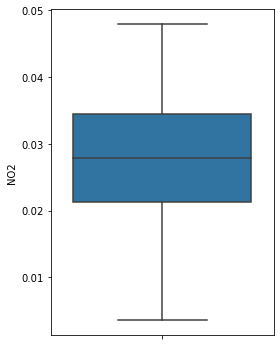

In [24]:
#NO2 Levels by Stations
fig, axes = plt.subplots(1, 1, figsize=(4, 6))
sns.boxplot(y='NO2', data=df, showfliers=False);

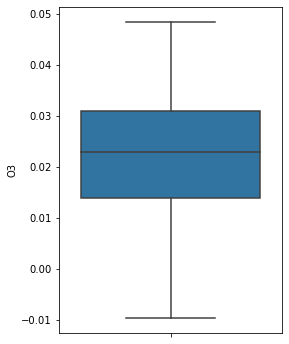

In [25]:
#O3 Levels by Stations
fig, axes = plt.subplots(1, 1, figsize=(4, 6))
sns.boxplot(y='O3', data=df, showfliers=False);

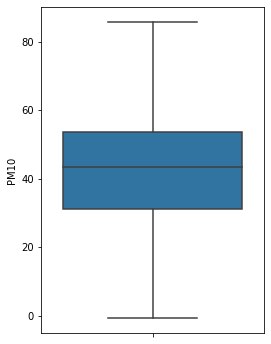

In [26]:
#PM10 Levels by Stations
fig, axes = plt.subplots(1, 1, figsize=(4, 6))
sns.boxplot(y='PM10', data=df, showfliers=False);

In [27]:
df

,Station code,Measurement date,SO2,NO2,O3,CO,PM10,PM2.5
0,101,2017-01,0.004401,0.037481,0.014972,0.695968,51.024194,35.118280
1,101,2017-02,-0.022152,0.010290,-0.008138,0.600000,41.970238,28.857143
2,101,2017-03,0.005015,0.041267,0.026862,0.698118,55.146505,40.311828
3,101,2017-04,0.003308,0.034699,0.033512,0.598056,50.769444,26.536111
4,101,2017-05,0.003461,0.031724,0.039319,0.490591,55.129032,22.680108
...,...,...,...,...,...,...,...,...
895,125,2019-08,0.005264,0.017182,0.026261,0.599189,24.952703,19.087838
896,125,2019-09,-0.010603,0.005673,0.010133,0.367791,20.604294,12.699387
897,125,2019-10,0.003179,0.024047,0.018567,0.432392,35.092742,17.689516
898,125,2019-11,0.003303,0.035814,0.011037,0.567083,49.201389,23.179167


In [28]:
df_station

,Station code,Station name(district),Address,Latitude,Longitude
0,101,Jongno-gu,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005008
1,102,Jung-gu,"15, Deoksugung-gil, Jung-gu, Seoul, Republic o...",37.564263,126.974676
2,103,Yongsan-gu,"136, Hannam-daero, Yongsan-gu, Seoul, Republic...",37.540033,127.004850
3,104,Eunpyeong-gu,"215, Jinheung-ro, Eunpyeong-gu, Seoul, Republi...",37.609823,126.934848
4,105,Seodaemun-gu,"32, Segeomjeong-ro 4-gil, Seodaemun-gu, Seoul,...",37.593742,126.949679
5,106,Mapo-gu,"10, Poeun-ro 6-gil, Mapo-gu, Seoul, Republic o...",37.555580,126.905597
6,107,Seongdong-gu,"18, Ttukseom-ro 3-gil, Seongdong-gu, Seoul, Re...",37.541864,127.049659
7,108,Gwangjin-gu,"571, Gwangnaru-ro, Gwangjin-gu, Seoul, Republi...",37.547180,127.092493
8,109,Dongdaemun-gu,"43, Cheonho-daero 13-gil, Dongdaemun-gu, Seoul...",37.575743,127.028885
9,110,Jungnang-gu,"369, Yongmasan-ro, Jungnang-gu, Seoul, Republi...",37.584848,127.094023


Testing every station and see what pollutants are relavent to each station before modeling and testing. I will sperate every year and see if it shows the variation

Station 101

In [29]:
df_101_2017 = df[df['Station code'] == 101]


In [30]:
df_101_2017

,Station code,Measurement date,SO2,NO2,O3,CO,PM10,PM2.5
0,101,2017-01,0.004401,0.037481,0.014972,0.695968,51.024194,35.118280
1,101,2017-02,-0.022152,0.010290,-0.008138,0.600000,41.970238,28.857143
2,101,2017-03,0.005015,0.041267,0.026862,0.698118,55.146505,40.311828
3,101,2017-04,0.003308,0.034699,0.033512,0.598056,50.769444,26.536111
4,101,2017-05,0.003461,0.031724,0.039319,0.490591,55.129032,22.680108
5,101,2017-06,0.003549,0.027914,0.042768,0.454722,34.968056,20.816667
6,101,2017-07,0.002220,0.027241,0.028976,0.460215,30.721774,21.071237
7,101,2017-08,-0.000659,0.020261,0.021765,0.405914,20.295699,10.704301
8,101,2017-09,0.003546,0.030233,0.029393,0.519861,28.136111,18.275000
9,101,2017-10,0.003235,0.029641,0.021341,0.470161,26.133065,15.213710


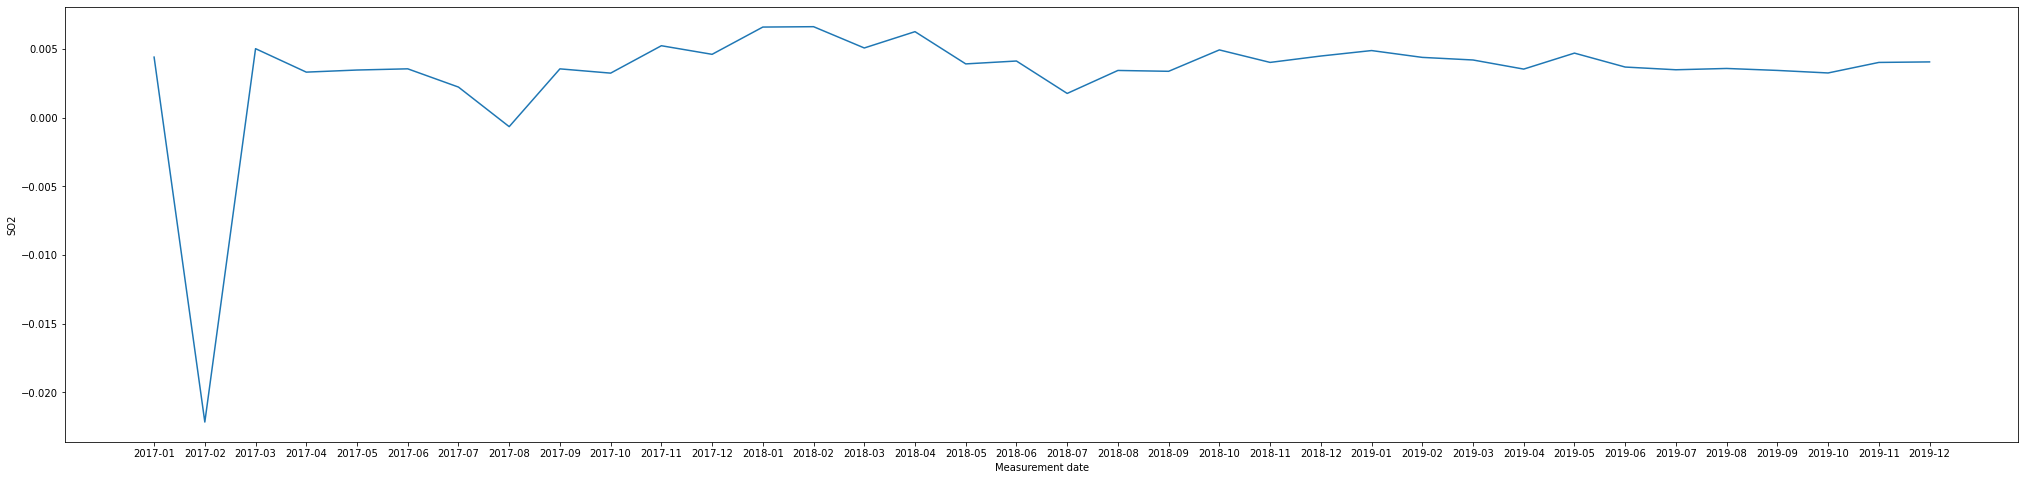

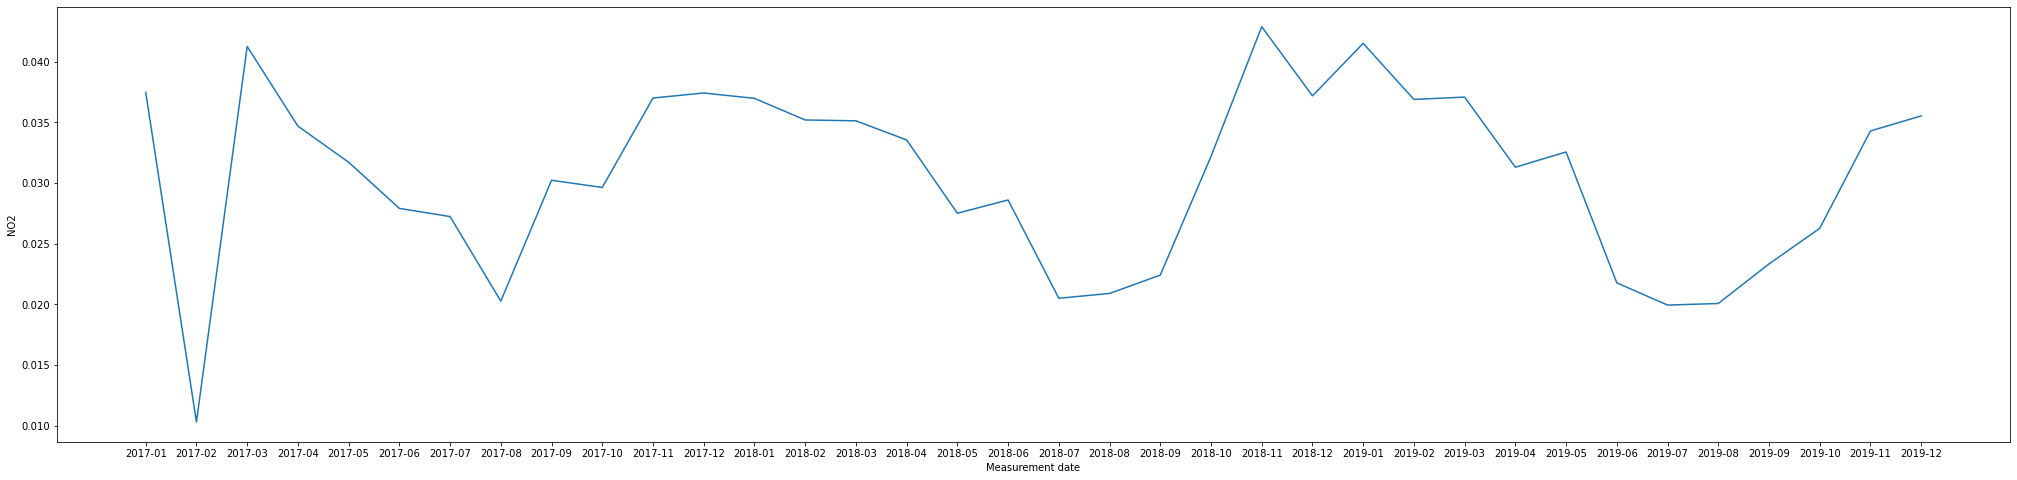

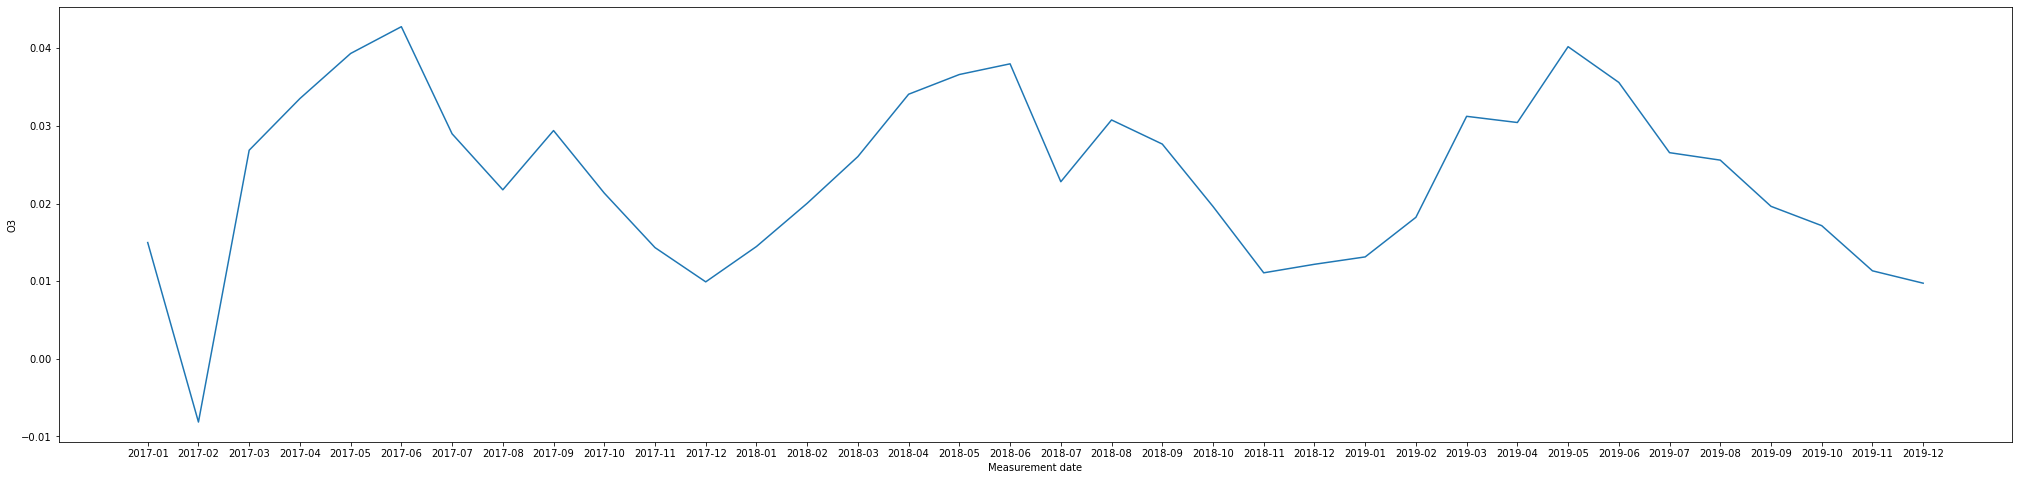

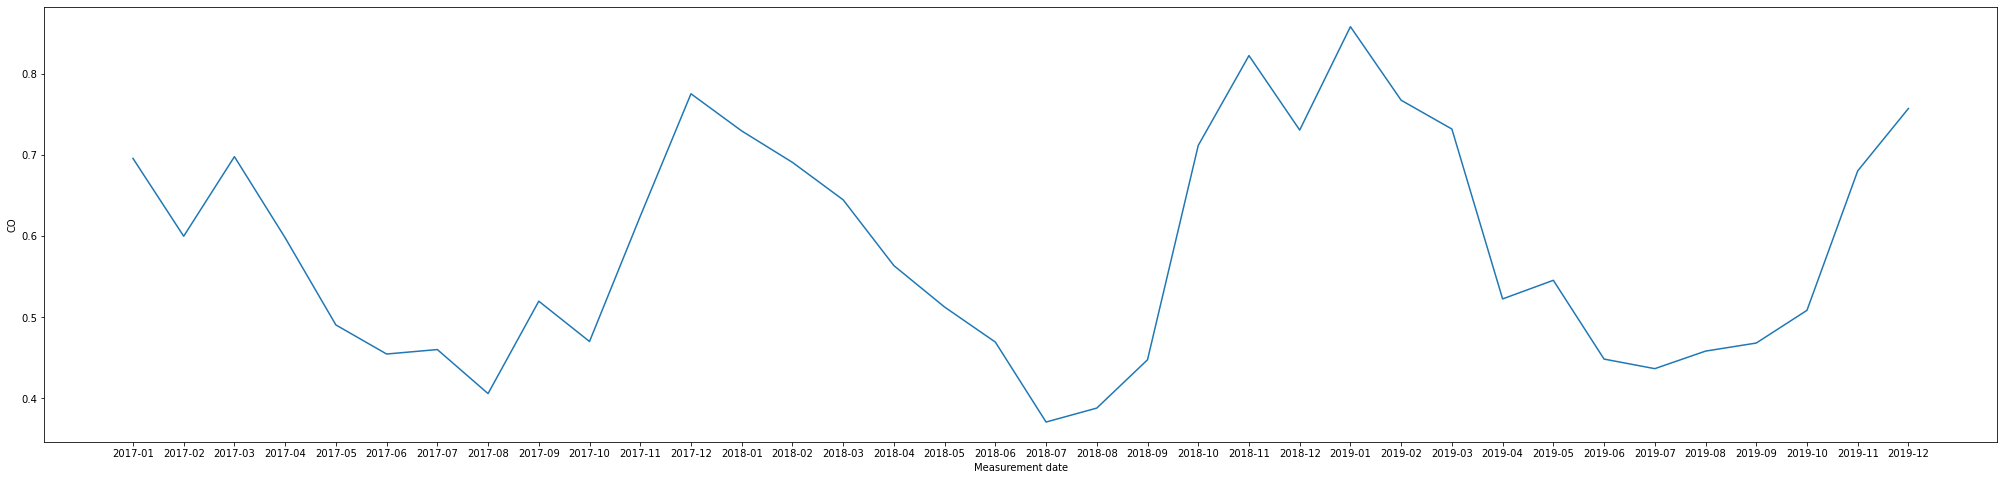

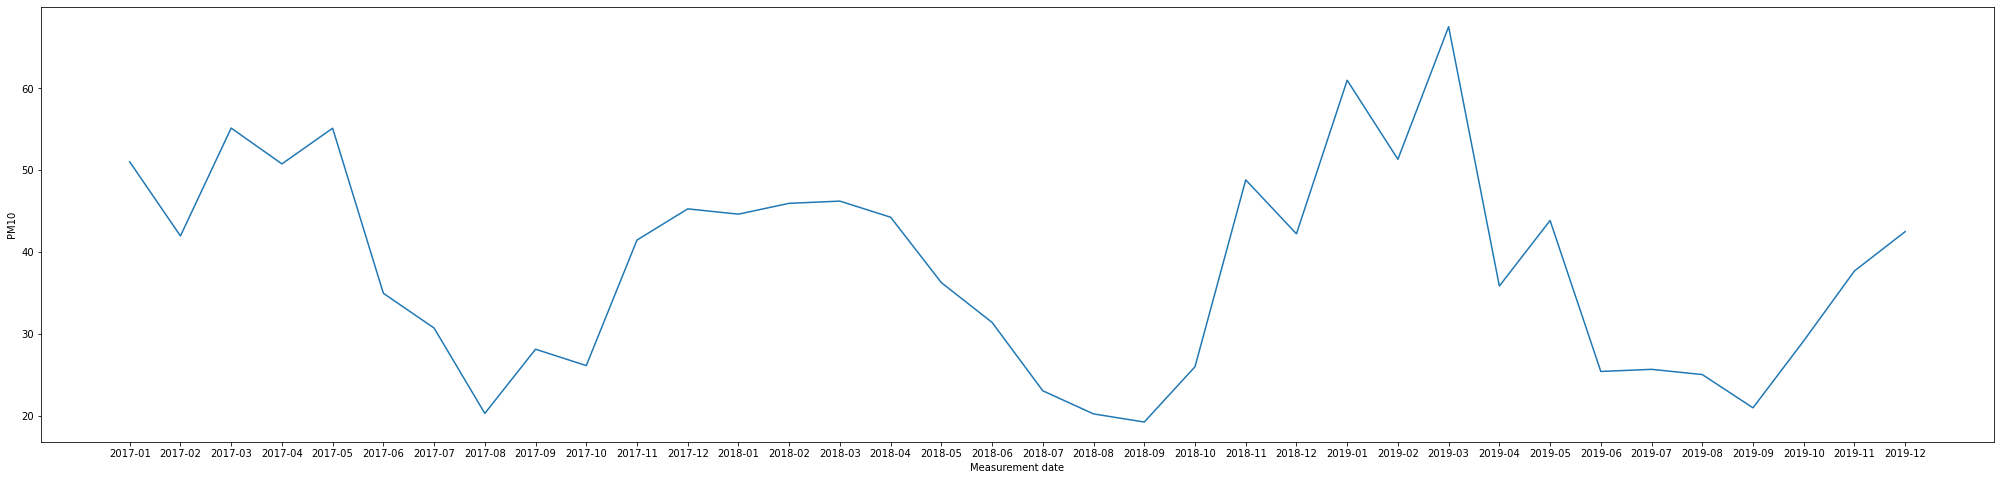

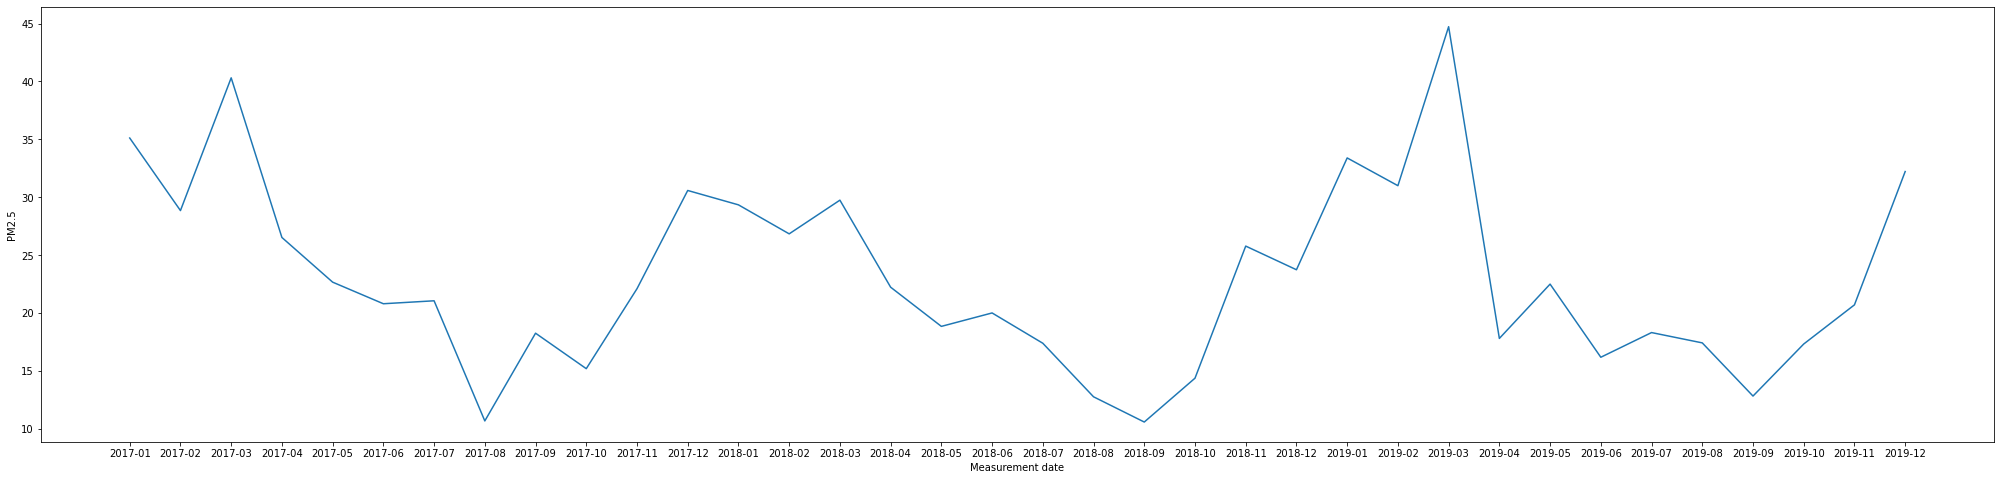

In [43]:
features = ['SO2', 'NO2', 'O3', 'CO', 'PM10', 'PM2.5']

for feature in features:
    plt.figure(figsize=(35,8))
    sns.lineplot(x='Measurement date', y=feature, data=df_101_2017)

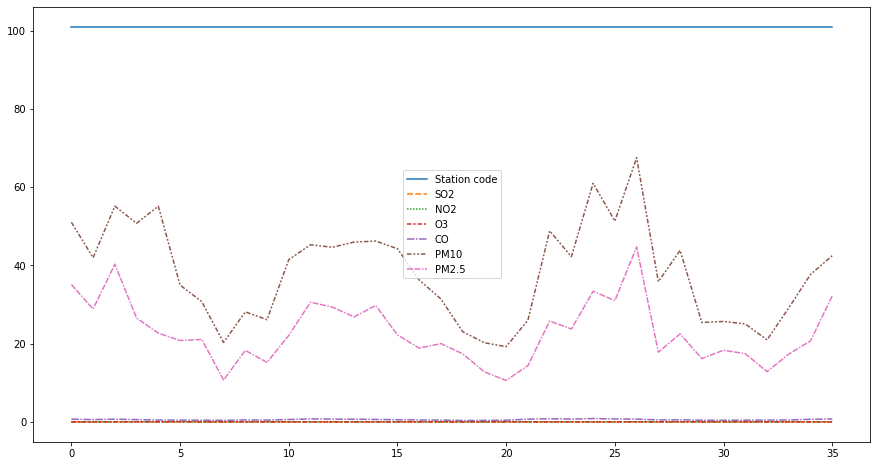

In [32]:
fig, ax = plt.subplots()
sns.lineplot(data = df_101_2017, )
fig.set_size_inches(15, 8);